[View in Colaboratory](https://colab.research.google.com/github/kmanicka/CarND-Traffic-Sign-Classifier-Project/blob/master/Udacity_Term_1_Traffic_Sign_Classifier.ipynb)

# **Self-Driving Car Engineer Nanodegree**

## Project: Build a Traffic Sign Recognition Classifier


### Download data and Unzip

In [4]:
#Download German Traffic Data Set

!rm *.p *.zip *.csv
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
!wget https://raw.githubusercontent.com/kmanicka/CarND-Traffic-Sign-Classifier-Project/master/signnames.csv

!unzip traffic-signs-data.zip
!cat signnames.csv

!ls -lrt


--2018-05-23 01:15:31--  https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.28.45
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.28.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M  11.2MB/s    in 28s     

2018-05-23 01:16:01 (4.18 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]

--2018-05-23 01:16:02--  https://raw.githubusercontent.com/kmanicka/CarND-Traffic-Sign-Classifier-Project/master/signnames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999 [text/pl

### Load and Prepare Data

In [6]:
import pickle
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline


training_file   = 'train.p' 
validation_file = 'valid.p' 
testing_file    = 'test.p'

print('training file name = ', training_file)
print('validation file name = ', validation_file)
print('testing file name = ', testing_file)


#Load Data

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


#Extract Constants

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]

image_shape = X_train[0].shape

n_classes = len(np.unique(y_test))

print("Shape of X_train =", X_train.shape)
print("Shape of X_test =", X_test.shape)
print("Shape of X_valid =", X_valid.shape)

print("Shape of Y_train =", y_train.shape)
print("Shape of Y_test =", y_test.shape)
print("Shape of Y_valid =", y_valid.shape)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


#Convert labels to one hot.
y_train_one_hot = to_categorical(y_train, n_classes)
y_valid_one_hot = to_categorical(y_valid, n_classes)
y_test_one_hot = to_categorical(y_test, n_classes)


print("Shape of y_train_one_hot =", y_train_one_hot.shape)
print("Shape of y_valid_one_hot =", y_valid_one_hot.shape)
print("Shape of y_test_one_hot =", y_test_one_hot.shape)


Using TensorFlow backend.


training file name =  train.p
validation file name =  valid.p
testing file name =  test.p
Shape of X_train = (34799, 32, 32, 3)
Shape of X_test = (12630, 32, 32, 3)
Shape of X_valid = (4410, 32, 32, 3)
Shape of Y_train = (34799,)
Shape of Y_test = (12630,)
Shape of Y_valid = (4410,)
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Shape of y_train_one_hot = (34799, 43)
Shape of y_valid_one_hot = (4410, 43)
Shape of y_test_one_hot = (12630, 43)


### Analyze Data

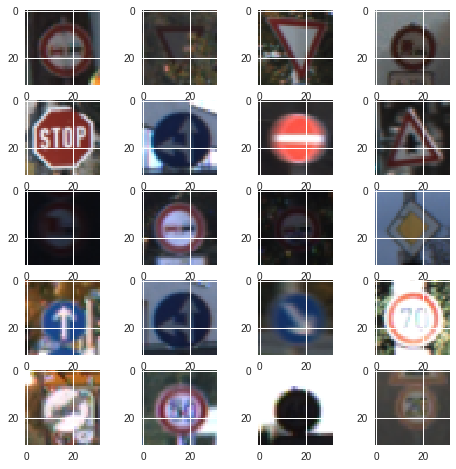

In [7]:
# view random samples 

fig=plt.figure(figsize=(8, 8))
columns,rows = 4,5
for i in range(1,columns*rows + 1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(X_train[np.random.randint(n_train)])

(array([2640., 1680., 2250., 1350.,  900.,  930.,  480.,  690.,  690.,
        1020.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 10 Patch objects>)

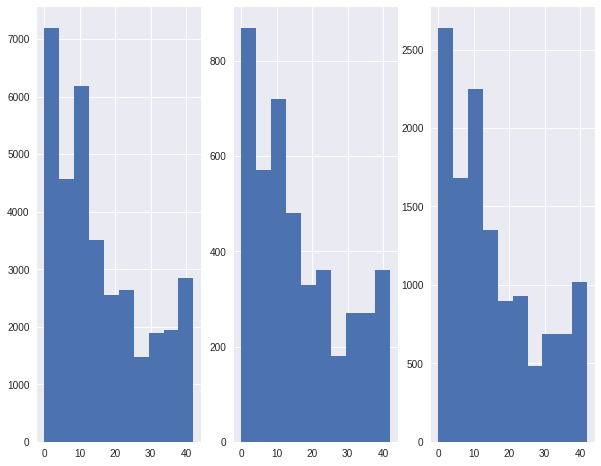

In [8]:
#Analyze distribution of the Images per class


fig=plt.figure(figsize=(10, 8))
columns,rows = 3,1
fig.add_subplot(rows, columns, 1)
plt.hist(y_train)
fig.add_subplot(rows, columns, 2)
plt.hist(y_valid)
fig.add_subplot(rows, columns, 3)
plt.hist(y_test)

### Build, Train and Evaluate Model 


#####################################################################
 Model Summary
#####################################################################
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)       

34799/34799 [==============================] - 5s 141us/step - loss: 15.3666 - acc: 0.0455 - val_loss: 15.3506 - val_acc: 0.0476
Epoch 2/20
34799/34799 [==============================] - 3s 93us/step - loss: 15.3539 - acc: 0.0473 - val_loss: 15.3506 - val_acc: 0.0476
Epoch 3/20
34799/34799 [==============================] - 3s 94us/step - loss: 15.3543 - acc: 0.0472 - val_loss: 15.3506 - val_acc: 0.0476
Epoch 4/20
34799/34799 [==============================] - 3s 93us/step - loss: 11.0524 - acc: 0.0810 - val_loss: 2.8019 - val_acc: 0.3567
Epoch 5/20
34799/34799 [==============================] - 3s 92us/step - loss: 1.9205 - acc: 0.4933 - val_loss: 0.9148 - val_acc: 0.7721
Epoch 6/20
11264/34799 [========>.....................] - ETA: 2s - loss: 0.9555 - acc: 0.7238

34799/34799 [==============================] - 3s 93us/step - loss: 0.8050 - acc: 0.7669 - val_loss: 0.7068 - val_acc: 0.8338
Epoch 7/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.4968 - acc: 0.8562 - val_loss: 0.3438 - val_acc: 0.9054
Epoch 8/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.3453 - acc: 0.9008 - val_loss: 0.3630 - val_acc: 0.9086
Epoch 9/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.2779 - acc: 0.9212 - val_loss: 0.2156 - val_acc: 0.9451
Epoch 10/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.2223 - acc: 0.9379 - val_loss: 0.2132 - val_acc: 0.9447
Epoch 11/20
13056/34799 [==========>...................] - ETA: 1s - loss: 0.2299 - acc: 0.9377

34799/34799 [==============================] - 3s 94us/step - loss: 0.1938 - acc: 0.9475 - val_loss: 0.2094 - val_acc: 0.9469
Epoch 12/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.1638 - acc: 0.9561 - val_loss: 0.2326 - val_acc: 0.9506
Epoch 13/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.1455 - acc: 0.9608 - val_loss: 0.1812 - val_acc: 0.9587
Epoch 14/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.1265 - acc: 0.9656 - val_loss: 0.2025 - val_acc: 0.9501
Epoch 15/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.1155 - acc: 0.9683 - val_loss: 0.1784 - val_acc: 0.9610
Epoch 16/20
13056/34799 [==========>...................] - ETA: 1s - loss: 0.1120 - acc: 0.9695

34799/34799 [==============================] - 3s 93us/step - loss: 0.1108 - acc: 0.9697 - val_loss: 0.2119 - val_acc: 0.9544
Epoch 17/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.0905 - acc: 0.9755 - val_loss: 0.1771 - val_acc: 0.9635
Epoch 18/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.0920 - acc: 0.9760 - val_loss: 0.1981 - val_acc: 0.9624
Epoch 19/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.0915 - acc: 0.9757 - val_loss: 0.1713 - val_acc: 0.9637
Epoch 20/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.0755 - acc: 0.9802 - val_loss: 0.2166 - val_acc: 0.9624

#####################################################################
 Training History
#####################################################################
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[15.350567069886223, 15.350567069886223, 15.350567069886223, 2.801891833584325, 0.9148210653101776, 0.70682441766

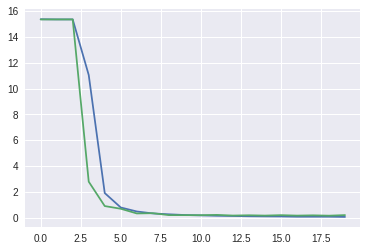


#####################################################################
 Evaluating Model
#####################################################################
12630/12630 [==============================] - 1s 104us/step

#####################################################################
Test loss: 0.29441352658059855
Test accuracy: 0.9475059382139646
#####################################################################


In [9]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, Adadelta


def LeNet(input_shape,classes, weights_path=None) :
  
  model = Sequential()

  #Layer 1 
  model.add(Conv2D(32, (5, 5), padding="valid",input_shape=input_shape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #Layer 2
  model.add(Conv2D(64, (5, 5), padding="valid"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  
  #Layer 3
  model.add(Dense(800))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
  
  #Layer 4
  model.add(Dense(128))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))

  #Layer 5
  model.add(Dense(classes))
  model.add(Activation("softmax"))

  
  return model

model = LeNet(image_shape,n_classes)

print()
print('#####################################################################')
print(' Model Summary')
print('#####################################################################')


model.summary()


model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

print()
print('#####################################################################')
print(' Training Model')
print('#####################################################################')


batch_size = 256 
epochs = 20 

print('batch_size ' + str(batch_size))
print('epochs ' + str(epochs))

history = model.fit(X_train, y_train_one_hot,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_valid, y_valid_one_hot))


print()
print('#####################################################################')
print(' Training History')
print('#####################################################################')


print(history.history.keys())
print(history.history['val_loss'])


train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.show()


print()
print('#####################################################################')
print(' Evaluating Model')
print('#####################################################################')


score = model.evaluate(X_test, y_test_one_hot, verbose=1)


print()
print('#####################################################################')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('#####################################################################')


In [0]:
#from numpy import genfromtxt

from pandas import read_csv
german_traffic_signs = read_csv('signnames.csv').values 



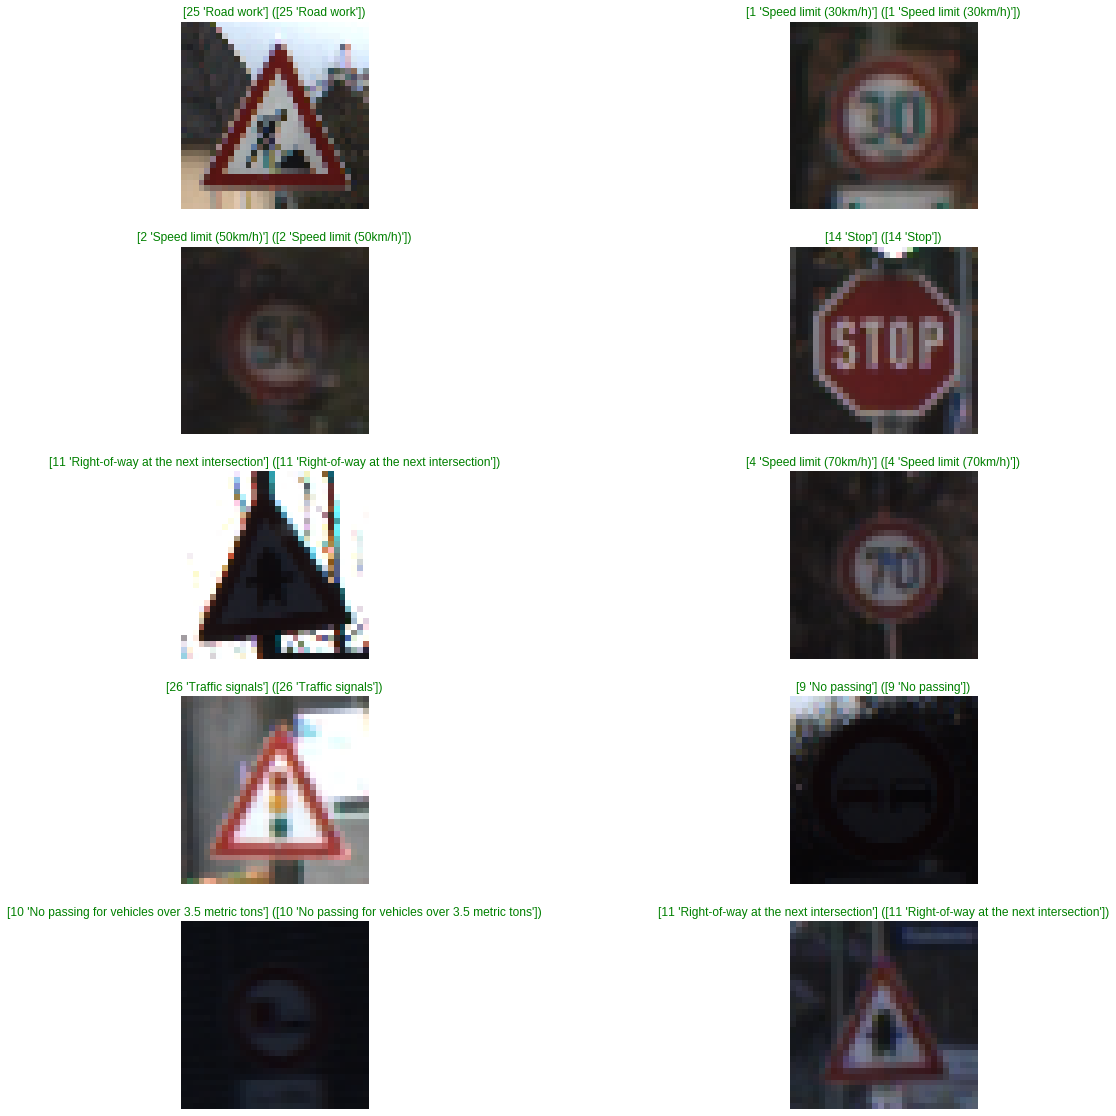

In [31]:
# View Predictions from Test


y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_one_hot[index])
    # Set the title for each image
    #ax.set_title("{} ({})".format(predict_index,true_index))
    
    ax.set_title("{} ({})".format(german_traffic_signs[predict_index], 
                                  german_traffic_signs[true_index]),
                                  color=("green" if predict_index == true_index else "red"))